In [1]:
import sys
import csv
import glob
import errno
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

path = './FSP-212-data/20200330/*.csv'
da = np.array([])
files = glob.glob(path)
title = ['time', '\tLoad0', '\tLoad1', '\tLoad2', '\tLoad3', '\tLoad4', '\tLoad5', '\tLoad6']

for name in files:
    try:
        with open(name) as csvDataFile:
            csvReader = csv.reader(csvDataFile)
            for row in csvReader:
                if(row != title):
                    da = np.append(da,row,axis=0)
    except IOError as exc:
        if exc.errno != errno.EISDIR:
            raise
            
da.reshape(int(da.size) // 8, 8)

array([['2020033011.00.01.04', '\t1', '\t1', ..., '\t1', '\t1', '\t1'],
       ['2020033011.00.06.04', '\t1', '\t1', ..., '\t1', '\t1', '\t1'],
       ['2020033011.00.11.04', '\t1', '\t1', ..., '\t1', '\t1', '\t1'],
       ...,
       ['2020033015.32.52.31', '\t1', '\t1', ..., '\t1', '\t1', '\t1'],
       ['2020033015.32.57.31', '\t1', '\t1', ..., '\t1', '\t1', '\t1'],
       ['2020033015.32.57.31', '0', '0', ..., '0', '0', '']], dtype='<U32')

In [27]:
des = da.reshape(int(da.size) // 8, 8)
des

array([['2020033011.00.01.04', '\t1', '\t1', ..., '\t1', '\t1', '\t1'],
       ['2020033011.00.06.04', '\t1', '\t1', ..., '\t1', '\t1', '\t1'],
       ['2020033011.00.11.04', '\t1', '\t1', ..., '\t1', '\t1', '\t1'],
       ...,
       ['2020033015.32.47.31', '\t1', '\t1', ..., '\t1', '\t1', '\t1'],
       ['2020033015.32.52.31', '\t1', '\t1', ..., '\t1', '\t1', '\t1'],
       ['2020033015.32.57.31', '\t1', '\t1', ..., '\t1', '\t1', '\t1']],
      dtype='<U32')

In [28]:
dist = np.array(des, copy=True)
numbers = np.delete(dist, 0,1 )
time = np.delete(dist, np.s_[1:],1)
numbers

array([['\t1', '\t1', '\t1', ..., '\t1', '\t1', '\t1'],
       ['\t1', '\t1', '\t1', ..., '\t1', '\t1', '\t1'],
       ['\t1', '\t1', '\t1', ..., '\t1', '\t1', '\t1'],
       ...,
       ['\t1', '\t1', '\t1', ..., '\t1', '\t1', '\t1'],
       ['\t1', '\t1', '\t1', ..., '\t1', '\t1', '\t1'],
       ['\t1', '\t1', '\t1', ..., '\t1', '\t1', '\t1']], dtype='<U32')

In [29]:
rows = numbers.shape[0]
cols = numbers.shape[1]
for i in range(0, rows):
    for j in range(0,cols):
        numbers[i,j] = int(numbers[i,j])
    


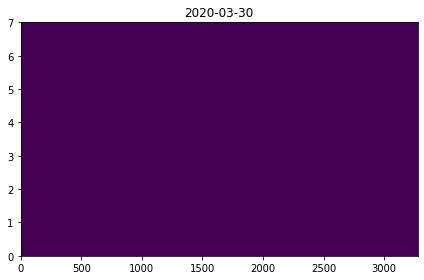

In [30]:
fig, (ax0) = plt.subplots(1)

c = ax0.pcolor(numbers.astype(np.float).T)
ax0.set_title('2020-03-30')


fig.tight_layout()
# fig.savefig('plot20200330.pdf')
plt.show()
